## The Research Example in Chapter 6: An Exoplanet Transit

In [4]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [ ]:
imlist = []
jd = []

for i in range(1237):
    fn = f'../../BookDatasets/TESS/HAT-P-11/{i}.fits'
    imlist.append(fits.getdata(fn))
    jd.append(fits.getheader(fn)['btjd'])

imlist = np.array(imlist)
jd = np.array(jd)

In [3]:
print(jd)
print(jd.shape)
print(imlist.shape)

[1683.36712646 1683.38800049 1683.40881348 ... 1710.13824463 1710.15905762
 1710.17987061]
(1237,)
(1237, 20, 20)


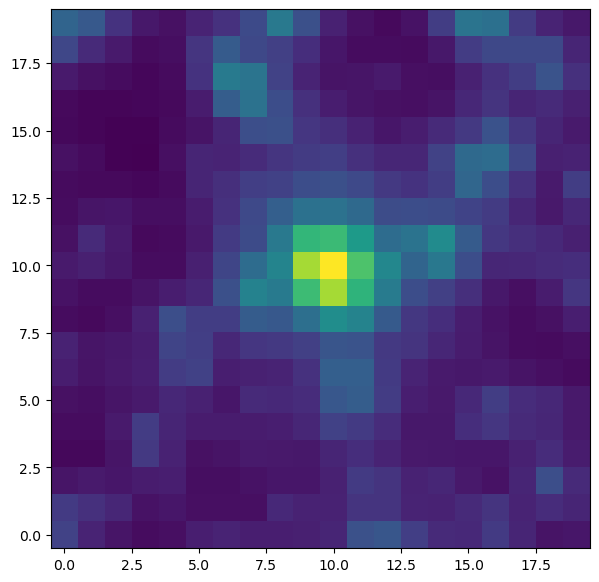

In [5]:
fix, ax = plt.subplots(figsize=(7,7))
ax.imshow(np.log10(imlist[0]), origin='lower')

### Exercise 6.1

In [7]:
# 6.1.1: Create a subarray of the 3rd through 10th image, but only for the
# first three rows and columns of those images.

subimlist = imlist[3:11,0:3,0:3]

print(subimlist.shape)

(8, 3, 3)


In [11]:
# 6.1.2: Create a subarray of the central 5x5 pixels, but only for images
# with even numbered indices.

central_imlist = imlist[::2,8:13,8:13] # leaves out pixels 0 to 7 and 13 to 19

print(central_imlist.shape)

(619, 5, 5)


### Cropping and Summing

In [15]:
cropped_array = imlist[:,8:13,8:13]
flux = np.sum(cropped_array, axis=(1,2))
flux.shape

(1237,)

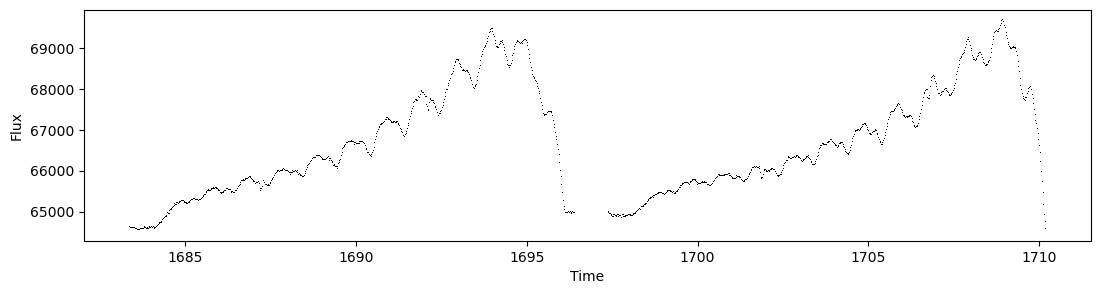

In [17]:
fig, ax = plt.subplots(figsize=(13,3))
ax.plot(jd, flux, 'k,')
ax.set_xlabel('Time')
ax.set_ylabel('Flux');

### Background Subtraction